## Task 1


a) Load the Dataset


In [24]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📂 Step 2: Load Data
df = pd.read_csv("visitor_count_dataset.csv")

# 🧾 Display First Rows
print("First 5 rows:")
df.head(5)



First 5 rows:


,time_segment,VisitorCount,DayOfWeek,is_official_holiday,is_school_holiday,is_bridge_day,Weekday,Month,Winter,Spring,...,Autumn,after_holiday,after_bridge,after_school_holiday,precip_quantity,temp_avg,wind_speed_10m,humidity_rel_shelter_avg,pressure,sun_duration
0,AfterNoor,46,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
1,Morning,123,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
2,Noon,83,Friday,0,1,0,4,1,1,0,...,0,0,0,0,0.12,3.90,2.48,92.28,1037.73,0.0
3,Morning,100,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0
4,Noon,84,Saturday,0,1,0,5,1,1,0,...,0,0,0,1,2.52,5.92,3.50,97.87,1033.61,0.0


b) Displaying the summary statistics of the dataset.

In [25]:

if 'df' in globals():
	print("\nSummary Statistics:")
	print(df.describe())




Summary Statistics:
       VisitorCount  is_official_holiday  is_school_holiday  is_bridge_day  \
count   8041.000000               8041.0        8041.000000    8041.000000   
mean      59.833478                  0.0           0.281681       0.010571   
std       26.958024                  0.0           0.449847       0.102276   
min        1.000000                  0.0           0.000000       0.000000   
25%       40.000000                  0.0           0.000000       0.000000   
50%       57.000000                  0.0           0.000000       0.000000   
75%       76.000000                  0.0           1.000000       0.000000   
max      191.000000                  0.0           1.000000       1.000000   

           Weekday        Month       Winter       Spring       Summer  \
count  8041.000000  8041.000000  8041.000000  8041.000000  8040.000000   
mean      2.406417     6.410024     0.241015     0.259296     0.264303   
std       1.725642     3.389902     0.427726     0.438

c) Check for missing values.

In [26]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
time_segment                0
VisitorCount                0
DayOfWeek                   0
is_official_holiday         0
is_school_holiday           0
is_bridge_day               0
Weekday                     0
Month                       0
Winter                      0
Spring                      0
Summer                      1
Autumn                      0
after_holiday               0
after_bridge                0
after_school_holiday        0
precip_quantity             5
temp_avg                    5
wind_speed_10m              4
humidity_rel_shelter_avg    5
pressure                    5
sun_duration                5
dtype: int64


d) Plot the distribution of any 2 numerical and 2 categorical features.

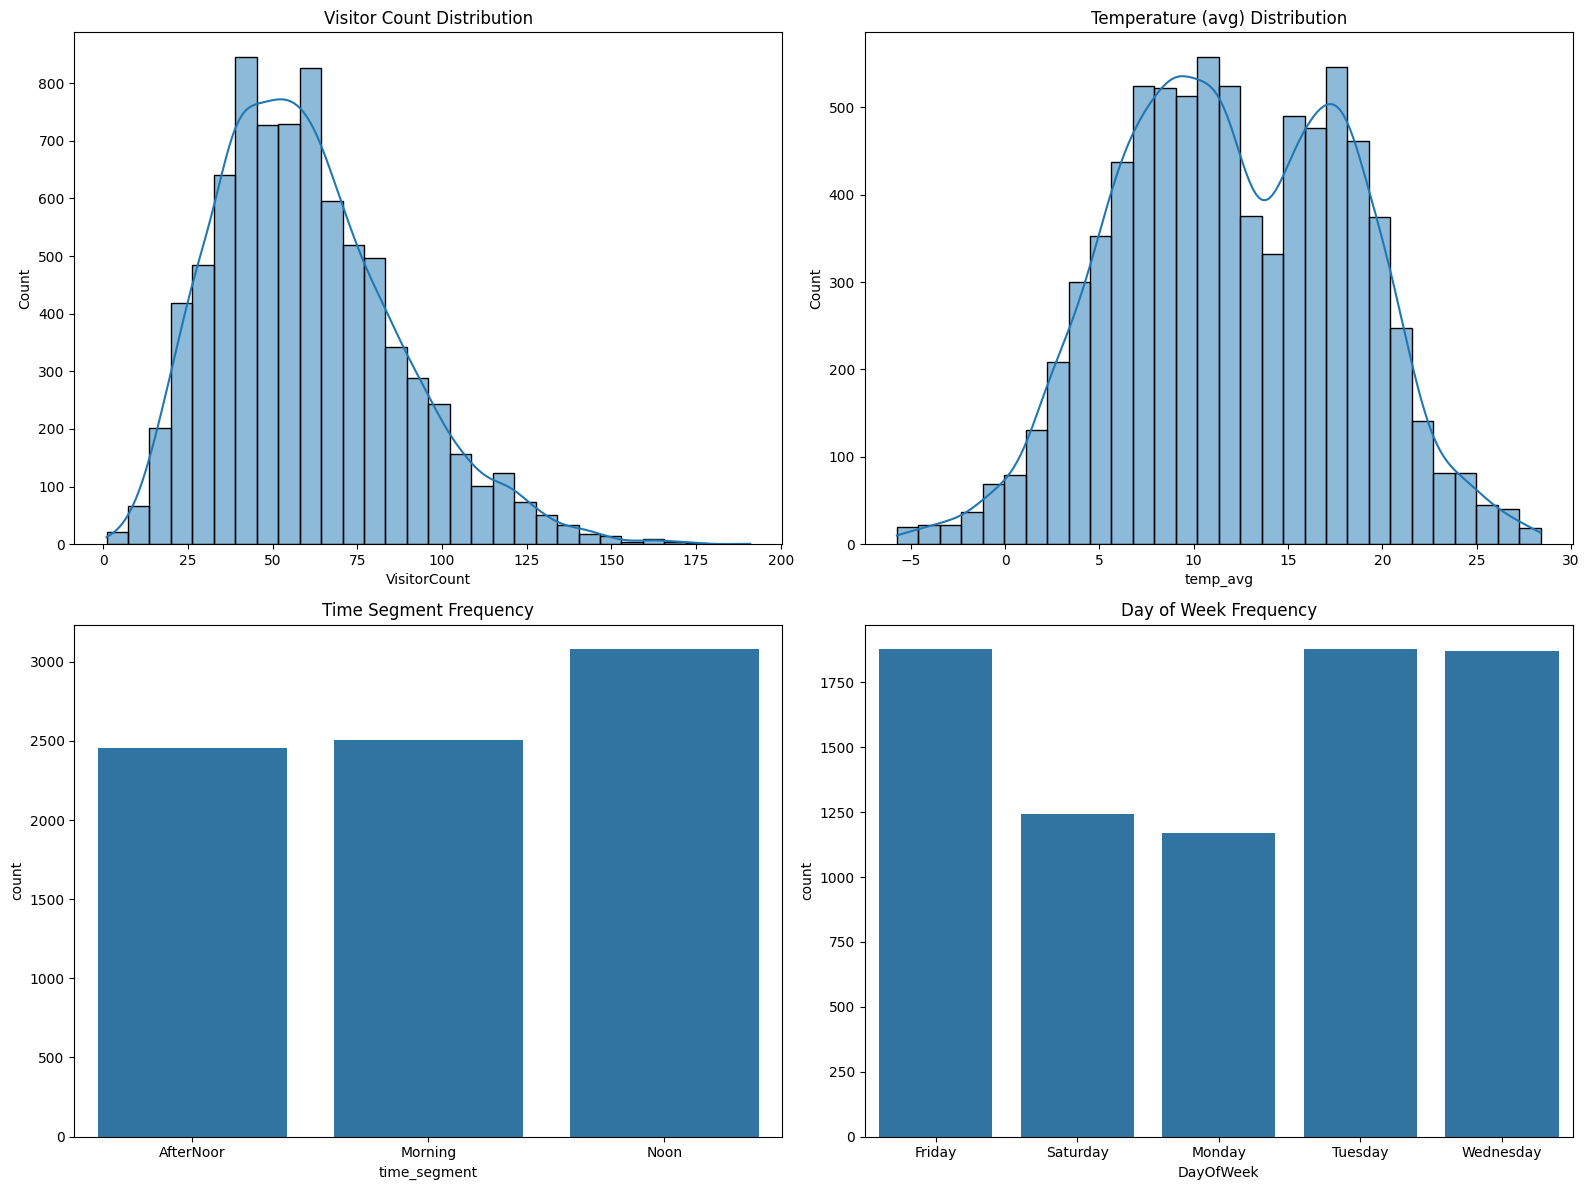

In [27]:
# 📉 Visualizations
plt.figure(figsize=(16, 12))

# VisitorCount Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['VisitorCount'], kde=True, bins=30)
plt.title("Visitor Count Distribution")

# Temperature Average Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['temp_avg'].dropna(), kde=True, bins=30)
plt.title("Temperature (avg) Distribution")

# Categorical: Time Segment
plt.subplot(2, 2, 3)
sns.countplot(x='time_segment', data=df)
plt.title("Time Segment Frequency")

# Categorical: Day of Week
plt.subplot(2, 2, 4)
sns.countplot(x='DayOfWeek', data=df)
plt.title("Day of Week Frequency")

plt.tight_layout()
plt.show()

e) Plot the correlation matrix (heatmap) among numerical features.

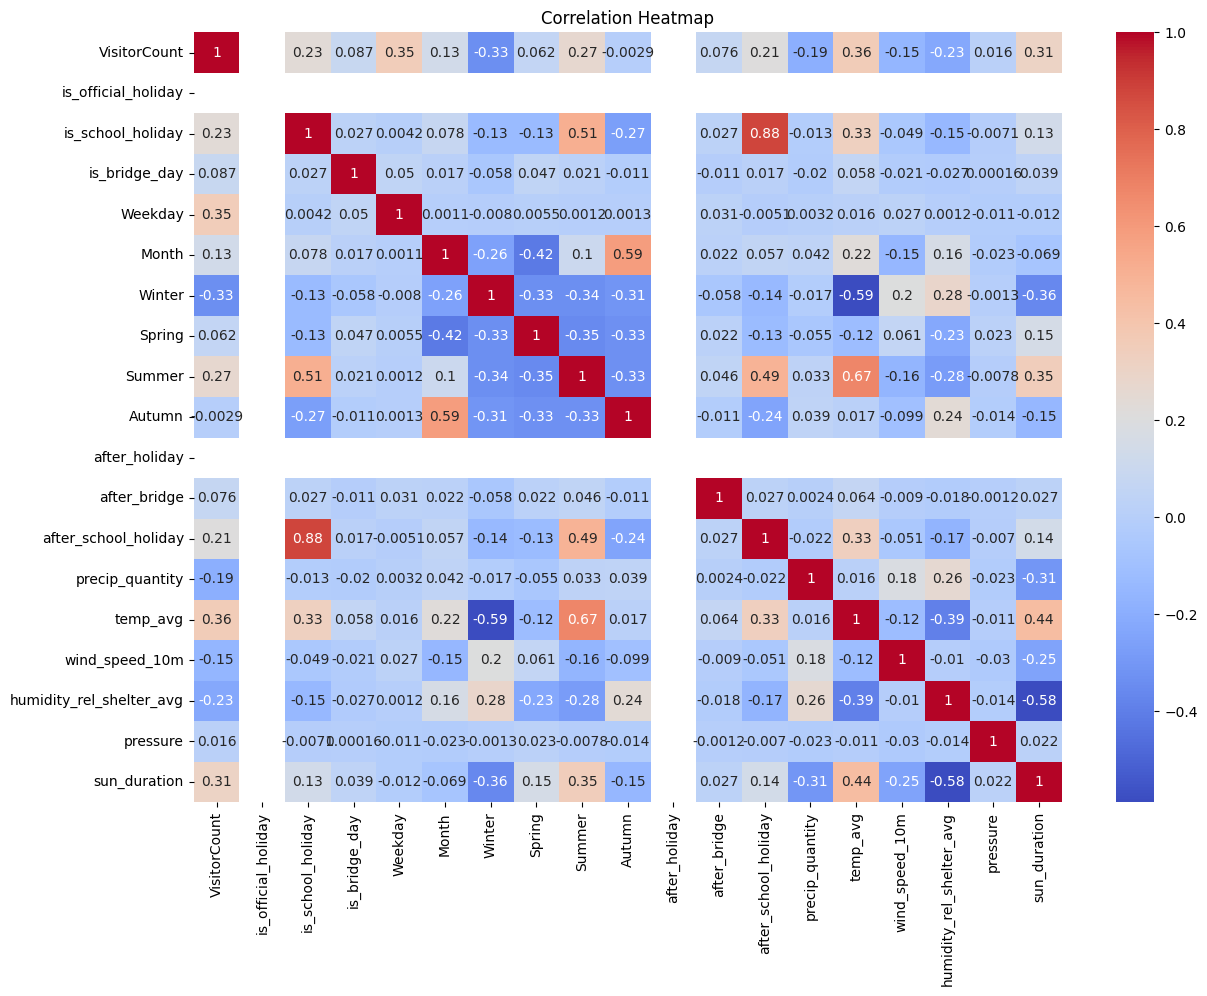

In [28]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Task 2

a) Handle missing values and outlier appropriately (imputation or removal).

In [29]:
# Fill missing numerical values with median (robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)

# Outlier Handling: optional - clip extreme outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)

for col in ['VisitorCount', 'temp_avg', 'wind_speed_10m', 'humidity_rel_shelter_avg', 'pressure', 'sun_duration']:
    remove_outliers_iqr(df, col)


b) Show best 5 features using multiple feature engineering technique

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression

X_all = df.drop('VisitorCount', axis=1)
y_all = df['VisitorCount']

# One-hot encode before feature selection
X_encoded = pd.get_dummies(X_all, drop_first=True)

# 1. Random Forest Importance
rf = RandomForestRegressor()
rf.fit(X_encoded, y_all)
rf_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)

# 2. Mutual Information
mi_scores = pd.Series(mutual_info_regression(X_encoded, y_all), index=X_encoded.columns)

# Combine both methods
combined_scores = (rf_importances.rank() + mi_scores.rank()).sort_values(ascending=False)

# Best top 5 features
top_5_features = combined_scores.head(5).index.tolist()
print("Top 5 features:", top_5_features)


Top 5 features: ['temp_avg', 'Weekday', 'sun_duration', 'DayOfWeek_Saturday', 'humidity_rel_shelter_avg']


 c) Encode Categorical Variables

In [31]:
# Encode categorical variables using one-hot encoding
categorical_cols = X_all.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encoding (if not already done)
if categorical_cols:
    X_encoded = pd.get_dummies(X_all, columns=categorical_cols, drop_first=True)
else:
    X_encoded = X_all.copy()

print("Categorical columns encoded:", categorical_cols)


Categorical columns encoded: ['time_segment', 'DayOfWeek']


 d) Normalize or Standardize Numerical Features

In [32]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
num_cols = ['temp_avg', 'wind_speed_10m', 'humidity_rel_shelter_avg', 'pressure', 'sun_duration']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


e) Train-Test Split (80%-20%)

In [33]:
from sklearn.model_selection import train_test_split

# Final dataset based on top 5 features
X = X_encoded[top_5_features]
y = y_all

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (6432, 5)
Testing size: (1609, 5)


## Task 3

 a) Train at least 2 regression models
We’ll use:

Linear Regression

Random Forest Regressor

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


b) Evaluate with MSE and R² score

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")
print(f"Random Forest     - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Linear Regression - MSE: 435.99, R2: 0.39
Random Forest     - MSE: 310.84, R2: 0.56


 c) Plot result comparison

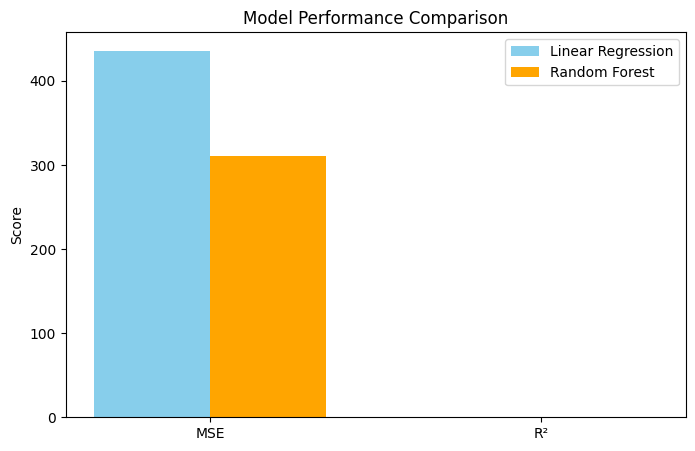

In [36]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['MSE', 'R²']
lr_scores = [mse_lr, r2_lr]
rf_scores = [mse_rf, r2_rf]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, lr_scores, width, label='Linear Regression', color='skyblue')
plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='orange')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()


e) Model Selection Explanation

In [37]:
# Explanation
if mse_rf < mse_lr and r2_rf > r2_lr:
    print("✅ Random Forest is the better model.")
    print("It has lower MSE and higher R² score compared to Linear Regression.")
    print("Random Forest captures non-linear patterns better, making it more suitable for predicting VisitorCount.")
else:
    print("⚠️ Linear Regression might be better or similar. Check for overfitting or model tuning.")


✅ Random Forest is the better model.
It has lower MSE and higher R² score compared to Linear Regression.
Random Forest captures non-linear patterns better, making it more suitable for predicting VisitorCount.


##  Task 5: Conclusion and Recommendations

###  a) Conclusion

After performing data preprocessing, feature selection, and model training, we observed that the **Random Forest Regressor** significantly outperforms the **Linear Regression** model in terms of both **Mean Squared Error (MSE)** and **R² score**. This indicates that the data contains complex, non-linear relationships that are better captured by ensemble-based models. The top 5 influential features identified played a crucial role in improving prediction accuracy. Overall, the machine learning pipeline built can be used as a baseline for visitor count prediction.

###  b) Recommendations

1. **Add Time Series Features**  
   Include datetime features such as *“day of year”*, *“weekend/weekday”*, *“lag visitor counts”*, or *“public event indicators”* to capture temporal trends in visitor behavior.

2. **Use Advanced Models & Hyperparameter Tuning**  
   Try models like **XGBoost**, **LightGBM**, or **Gradient Boosting**, and apply **GridSearchCV** or **RandomizedSearchCV** to optimize model performance further.
